In [1]:
#importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

In [2]:
train = pd.read_csv("train_s3TEQDk.csv",index_col=0)
train

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
ID,,,,,,,,,,
NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...
BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0


Variable                            Definition

ID                                  Unique Identifier for a row

Gender                              Gender of the Customer

Age                                 Age of the Customer (in Years)

Region_Code                         Code of the Region for the customers

Occupation                          Occupation Type for the customer

Channel_Code                        Acquisition Channel Code for the Customer  (Encoded)

Vintage                             Vintage for the Customer (In Months)

Credit_Product                      If the Customer has any active credit product (Home loan,Personal loan, Credit Card etc.)

Avg_Account_Balance                 Average Account Balance for the Customer in last 12 Months

Is_Active                           If the Customer is Active in last 3 Months

Is_Lead(Target)                     If the Customer is interested for the Credit Card
                                     0 : Customer is not interested
                                     1 : Customer is interested

In [3]:
train.shape

(245725, 10)

In [4]:
#Check Null Values

train.isnull().sum()

Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [5]:
train["Credit_Product"].fillna(method ='ffill',inplace=True)

In [6]:
train.isnull().sum()

Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [7]:
#descriptive analysiss
train.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


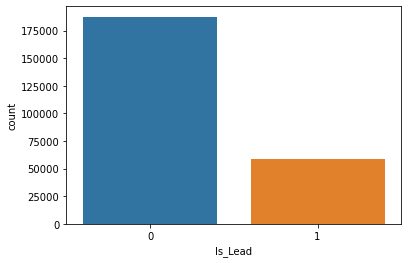

In [8]:

# Check Target Feature is Balanced or not.

plt.figure(figsize=(6,4))
sns.countplot(train["Is_Lead"])

In [9]:
train["Is_Lead"].value_counts()/245725*100

0    76.279174
1    23.720826
Name: Is_Lead, dtype: float64

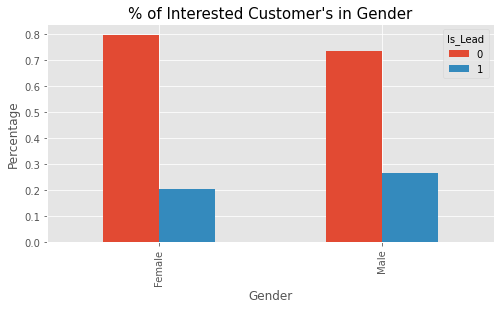

In [10]:

# Check How much of Male and Female are Interested in .

crosstab = pd.crosstab(train["Gender"],train["Is_Lead"])
style.use("ggplot")
crosstab.div(crosstab.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(8,4))
plt.title("% of Interested Customer's in Gender",fontsize=15)
plt.ylabel("Percentage",fontsize=12)
plt.show()

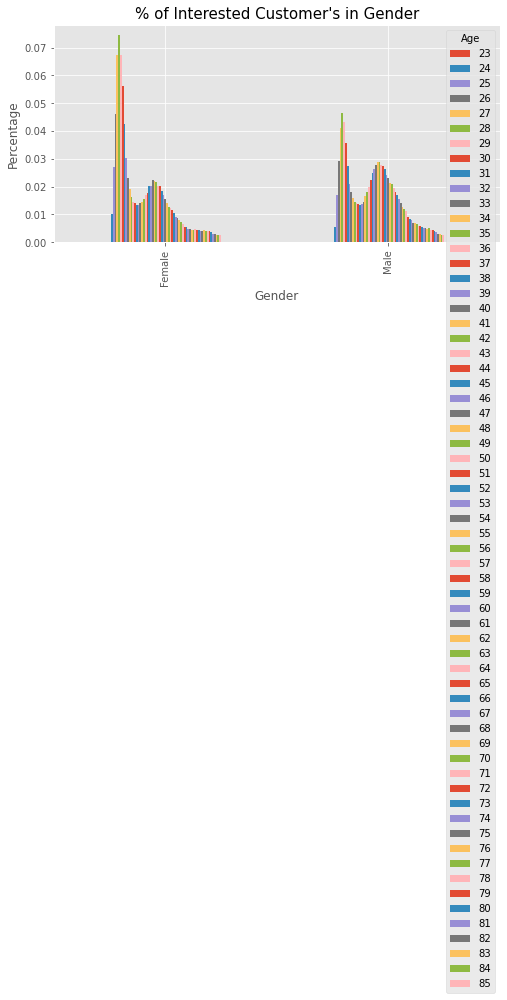

In [11]:
# Check How much of Male and Female are Aged .

crosstab = pd.crosstab(train["Gender"],train["Age"])
style.use("ggplot")
crosstab.div(crosstab.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(8,4))
plt.title("% of Interested Customer's in Gender",fontsize=15)
plt.ylabel("Percentage",fontsize=12)
plt.show()

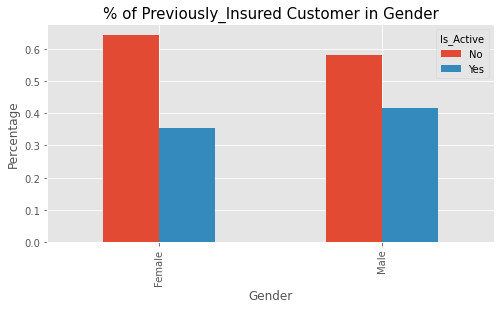

In [12]:
# Check Percentage of Active  Customers in Gender.
crosstab = pd.crosstab(train["Gender"],train["Is_Active"])
style.use("ggplot")
crosstab.div(crosstab.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(8,4))
plt.title("% of Previously_Insured Customer in Gender",fontsize=15)
plt.ylabel("Percentage",fontsize=12)
plt.show()

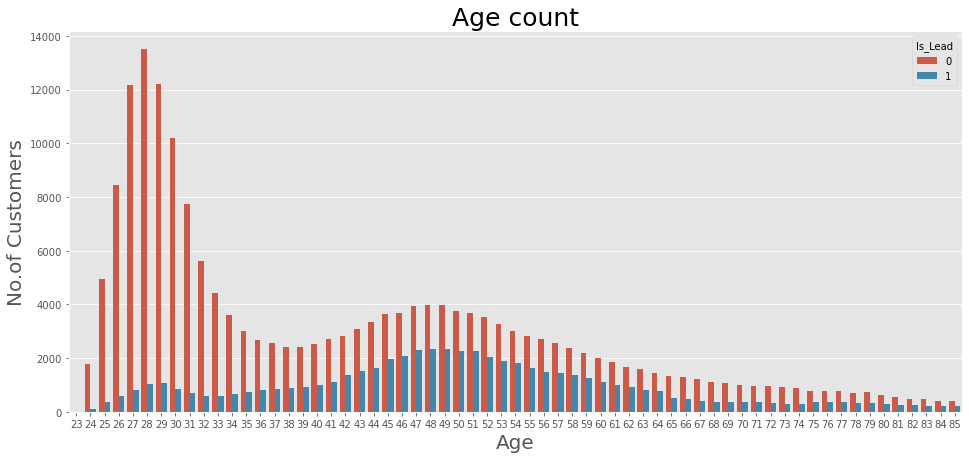

In [13]:

#Check which Age of Customer's has high presence in Dataset.
plt.figure(figsize=(16,7))
sns.countplot(x='Age', data=train, hue="Is_Lead")
plt.title("Age count",fontsize=25)
plt.xlabel("Age",fontsize=20)
plt.ylabel("No.of Customers",fontsize=20)
plt.show()

In [14]:

# Make a Groups of Age.

bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
train['Age_group'] = pd.cut(train["Age"], bins, labels = labels)
train

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Age_group
ID,,,,,,,,,,,
NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0,70+
IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0,18-29
HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0,50-59
BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0,30-39
TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0,18-29
...,...,...,...,...,...,...,...,...,...,...,...
BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,Yes,1925586,No,0,50-59
HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0,18-29
GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0,18-29


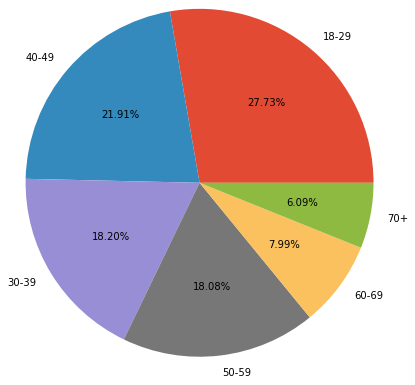

In [15]:
# Check Which Age_group has maximum numbers of records. 
slices = train['Age_group'].value_counts()/381109*100
age_group = ["18-29","40-49","30-39","50-59","60-69","70+"]
plt.pie(slices,labels=age_group,radius=2,autopct="%0.2f%%")
plt.show()

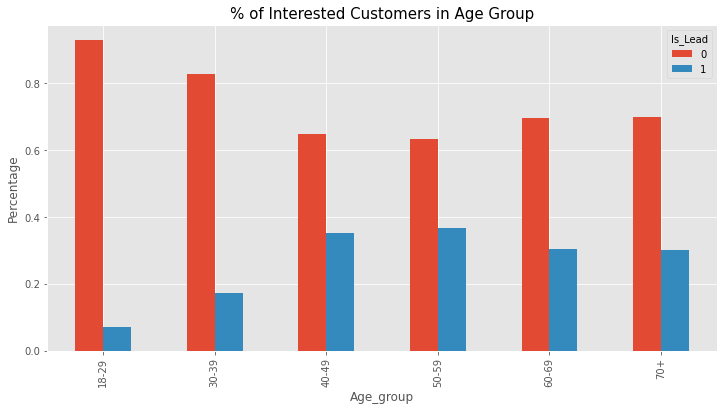

In [16]:
# Percentage of Customers to buy credit card in Age_group.

crosstab = pd.crosstab(train["Age_group"],train["Is_Lead"])
style.use("ggplot")
crosstab.div(crosstab.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(12,6))
plt.title("% of Interested Customers in Age Group",fontsize=15)
plt.ylabel("Percentage",fontsize=12)
plt.show()

In [17]:

train["Vintage"].describe()

count    245725.000000
mean         46.959141
std          32.353136
min           7.000000
25%          20.000000
50%          32.000000
75%          73.000000
max         135.000000
Name: Vintage, dtype: float64

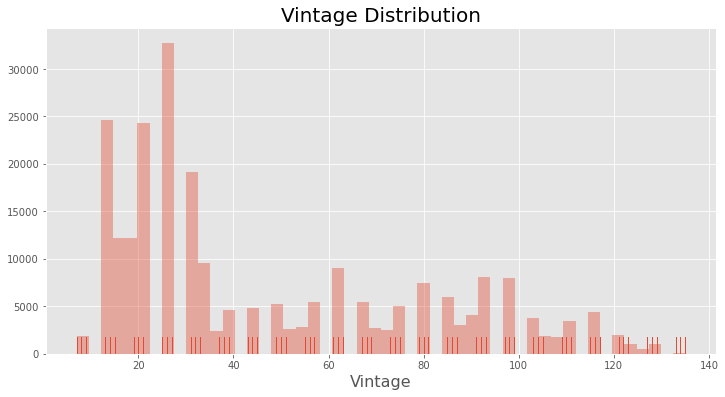

In [18]:
# Make Histogram to check the Distribution of Vintage feature.

plt.figure(figsize=(12,6))
sns.distplot(train["Vintage"], bins=50, kde=False, rug=True)
plt.title("Vintage Distribution",fontsize=20)
plt.xlabel("Vintage",fontsize=16)
plt.show()

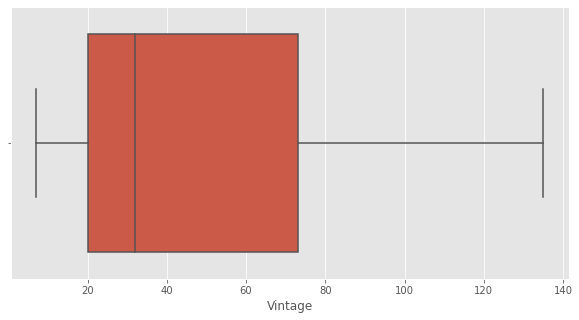

In [19]:
# Make Boxplot to check the outliers in Vintage feature.
plt.figure(figsize=(10,5))
sns.boxplot(train["Vintage"])
plt.show()

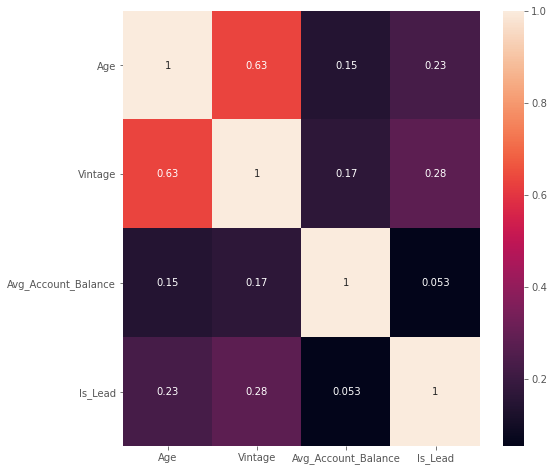

In [20]:
#checking corrleation using heatmap
plt.figure(figsize=(8,8))
sns.heatmap(train.corr(),annot=True)

In [21]:
train.columns

Index(['Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code', 'Vintage',
       'Credit_Product', 'Avg_Account_Balance', 'Is_Active', 'Is_Lead',
       'Age_group'],
      dtype='object')

In [22]:

train = train.drop(['Age_group',],axis=1)
train

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
ID,,,,,,,,,,
NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...
BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,Yes,1925586,No,0
HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0


# Load test data

In [23]:
test=pd.read_csv("test_mSzZ8RL.csv",index_col=0)
test

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
ID,,,,,,,,,
VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No
...,...,...,...,...,...,...,...,...,...
DBENJOYI,Male,52,RG268,Salaried,X2,86,Yes,4242558,Yes
CWQ72DWS,Male,55,RG277,Other,X2,86,Yes,1159153,No
HDESC8GU,Male,35,RG254,Salaried,X4,15,No,1703727,No


In [24]:
test.isnull().sum()

Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [25]:
test["Credit_Product"].fillna(method ='ffill',inplace=True)

In [26]:
test.isnull().sum()

Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
dtype: int64

In [27]:
test.shape

(105312, 9)

In [28]:
df = pd.concat([train,test])
df

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
ID,,,,,,,,,,
NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0.0
IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0.0
HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0.0
BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0.0
TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0.0
...,...,...,...,...,...,...,...,...,...,...
DBENJOYI,Male,52,RG268,Salaried,X2,86,Yes,4242558,Yes,NaN
CWQ72DWS,Male,55,RG277,Other,X2,86,Yes,1159153,No,NaN
HDESC8GU,Male,35,RG254,Salaried,X4,15,No,1703727,No,NaN


In [29]:
df.isnull().sum()

Gender                      0
Age                         0
Region_Code                 0
Occupation                  0
Channel_Code                0
Vintage                     0
Credit_Product              0
Avg_Account_Balance         0
Is_Active                   0
Is_Lead                105312
dtype: int64

In [30]:
df["Vintage"].describe()

count    351037.000000
mean         46.924244
std          32.329303
min           7.000000
25%          20.000000
50%          32.000000
75%          73.000000
max         135.000000
Name: Vintage, dtype: float64

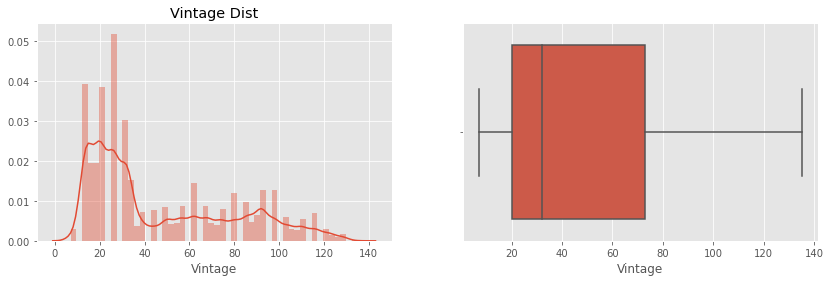

In [31]:

#Check Outlier's and Distribution by Histogram and boxplot in Vintage feature

plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.distplot(df["Vintage"])
plt.title("Vintage Dist")

plt.subplot(1,2,2)
sns.boxplot(df["Vintage"])
plt.show()

In [32]:
#Apply Probability Ratio Encoding to handle Region_Code  feature.


prob = df.groupby(["Region_Code"])["Is_Lead"].mean()

prob_df = pd.DataFrame(prob)

#find probability of Not Response.

prob_df["Not_Response"] = 1 - prob_df["Is_Lead"]

#probability ratio.

prob_df["Prob_Ratio"] = prob_df["Is_Lead"]/prob_df["Not_Response"]

df["Region_Code"] = df["Region_Code"].map(prob_df["Prob_Ratio"].to_dict())
df

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
ID,,,,,,,,,,
NNVBBKZB,Female,73,0.428163,Other,X3,43,No,1045696,No,0.0
IDD62UNG,Female,30,0.302000,Salaried,X1,32,No,581988,No,0.0
HD3DSEMC,Female,56,0.428163,Self_Employed,X3,26,No,1484315,Yes,0.0
BF3NC7KV,Male,34,0.168635,Salaried,X1,19,No,470454,No,0.0
TEASRWXV,Female,30,0.237842,Salaried,X1,33,No,886787,No,0.0
...,...,...,...,...,...,...,...,...,...,...
DBENJOYI,Male,52,0.428163,Salaried,X2,86,Yes,4242558,Yes,NaN
CWQ72DWS,Male,55,0.302000,Other,X2,86,Yes,1159153,No,NaN
HDESC8GU,Male,35,0.270412,Salaried,X4,15,No,1703727,No,NaN


In [33]:

# Probability Encoding change some recors in infinity or nan so lets handle this.

df.replace([np.inf, -np.inf], np.nan, inplace=True)

df.isnull().sum()

Gender                      0
Age                         0
Region_Code                 0
Occupation                  0
Channel_Code                0
Vintage                     0
Credit_Product              0
Avg_Account_Balance         0
Is_Active                   0
Is_Lead                105312
dtype: int64

In [34]:
df = pd.get_dummies(df,drop_first=True)
df


,Age,Region_Code,Vintage,Avg_Account_Balance,Is_Lead,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes
ID,,,,,,,,,,,,,,
NNVBBKZB,73,0.428163,43,1045696,0.0,0,1,0,0,0,1,0,0,0
IDD62UNG,30,0.302000,32,581988,0.0,0,0,1,0,0,0,0,0,0
HD3DSEMC,56,0.428163,26,1484315,0.0,0,0,0,1,0,1,0,0,1
BF3NC7KV,34,0.168635,19,470454,0.0,1,0,1,0,0,0,0,0,0
TEASRWXV,30,0.237842,33,886787,0.0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DBENJOYI,52,0.428163,86,4242558,NaN,1,0,1,0,1,0,0,1,1
CWQ72DWS,55,0.302000,86,1159153,NaN,1,1,0,0,1,0,0,1,0
HDESC8GU,35,0.270412,15,1703727,NaN,1,0,1,0,0,0,1,0,0


In [126]:

train = df.iloc[:245724,:]
train

,Age,Region_Code,Vintage,Avg_Account_Balance,Is_Lead,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes
ID,,,,,,,,,,,,,,
NNVBBKZB,73,0.428163,43,1045696,0.0,0,1,0,0,0,1,0,0,0
IDD62UNG,30,0.302000,32,581988,0.0,0,0,1,0,0,0,0,0,0
HD3DSEMC,56,0.428163,26,1484315,0.0,0,0,0,1,0,1,0,0,1
BF3NC7KV,34,0.168635,19,470454,0.0,1,0,1,0,0,0,0,0,0
TEASRWXV,30,0.237842,33,886787,0.0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DQ48DATH,38,0.308110,13,354665,0.0,0,0,1,0,1,0,0,1,0
BPAWWXZN,51,0.430687,109,1925586,0.0,1,0,0,1,0,1,0,1,0
HFNB7JY8,27,0.428163,15,862952,0.0,1,0,1,0,0,0,0,0,1


In [121]:
x_df = train.drop("Is_Lead",axis=1)
x_df

,Age,Region_Code,Vintage,Avg_Account_Balance,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes
ID,,,,,,,,,,,,,
NNVBBKZB,73,0.428163,43,1045696,0,1,0,0,0,1,0,0,0
IDD62UNG,30,0.302000,32,581988,0,0,1,0,0,0,0,0,0
HD3DSEMC,56,0.428163,26,1484315,0,0,0,1,0,1,0,0,1
BF3NC7KV,34,0.168635,19,470454,1,0,1,0,0,0,0,0,0
TEASRWXV,30,0.237842,33,886787,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCGTPX3T,72,0.201858,87,1426314,0,1,0,0,0,1,0,0,0
DIHKJQHS,67,0.291328,27,1767780,0,1,0,0,0,0,0,0,1
YEPYXRV9,27,0.200962,21,549361,0,0,1,0,0,0,0,1,0


In [122]:
# Take Dependent feature from Train dataset.

y_df = train["Is_Lead"]
y_df

ID
NNVBBKZB    0.0
IDD62UNG    0.0
HD3DSEMC    0.0
BF3NC7KV    0.0
TEASRWXV    0.0
           ... 
NCGTPX3T    0.0
DIHKJQHS    0.0
YEPYXRV9    0.0
NFVYJNQW    1.0
ARV8JURU    0.0
Name: Is_Lead, Length: 105313, dtype: float64

In [127]:
test = df.iloc[245724:,:]
test = test.drop("Is_Lead",axis=1)
test

,Age,Region_Code,Vintage,Avg_Account_Balance,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes
ID,,,,,,,,,,,,,
BOCZSWLJ,29,0.284804,21,1129276,1,0,1,0,0,0,0,0,0
VBENBARO,29,0.270412,25,742366,1,1,0,0,0,0,0,1,0
CCMEWNKY,43,0.428163,49,925537,1,1,0,0,1,0,0,1,0
VK3KGA9M,31,0.168635,14,215949,1,0,1,0,0,0,0,0,0
TT8RPZVC,29,0.281914,33,868070,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
DBENJOYI,52,0.428163,86,4242558,1,0,1,0,1,0,0,1,1
CWQ72DWS,55,0.302000,86,1159153,1,1,0,0,1,0,0,1,0
HDESC8GU,35,0.270412,15,1703727,1,0,1,0,0,0,1,0,0


In [128]:
test.shape

(105313, 13)

In [129]:
train.shape

(245724, 14)

In [130]:
from sklearn.preprocessing import MinMaxScaler


In [131]:
#Apply Feature Scaling on Train Dataset.

scaling = MinMaxScaler()
scaling_data = scaling.fit_transform(x_df)


x_df = pd.DataFrame(scaling_data,columns=x_df.columns)
x_df

,Age,Region_Code,Vintage,Avg_Account_Balance,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes
0,0.806452,0.983211,0.281250,0.104882,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.112903,0.522492,0.195312,0.057429,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.532258,0.983211,0.148438,0.149767,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.177419,0.035471,0.093750,0.046016,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.112903,0.288203,0.203125,0.088620,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105308,0.790323,0.156796,0.625000,0.143832,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
105309,0.709677,0.483522,0.156250,0.178775,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
105310,0.064516,0.153525,0.109375,0.054090,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
105311,0.112903,0.522492,0.156250,0.119386,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [132]:
# Similarly Apply Feature Scaling on test data.

scaling_test = scaling.transform(test)

test = pd.DataFrame(scaling_test,columns=test.columns)
test

,Age,Region_Code,Vintage,Avg_Account_Balance,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes
0,0.096774,0.459696,0.109375,0.113435,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.096774,0.407141,0.140625,0.073841,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.322581,0.983211,0.328125,0.092586,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.129032,0.035471,0.054688,0.019971,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.096774,0.449141,0.203125,0.086705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105308,0.467742,0.983211,0.617188,0.432027,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
105309,0.516129,0.522492,0.617188,0.116492,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
105310,0.193548,0.407141,0.062500,0.172220,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
105311,0.483871,0.407141,0.671875,0.073310,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [133]:
# Target Class is Imbalanced so make it Balanced.
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

smote_sampling = SMOTE()

new_x_df,new_y_df = smote_sampling.fit_resample(x_df,y_df)

In [134]:
continous_feature = new_x_df[["Age","Avg_Account_Balance","Vintage"]]
continous_feature

,Age,Avg_Account_Balance,Vintage
0,0.806452,0.104882,0.281250
1,0.112903,0.057429,0.195312
2,0.532258,0.149767,0.148438
3,0.177419,0.046016,0.093750
4,0.112903,0.088620,0.203125
...,...,...,...
160361,0.548387,0.060908,0.697453
160362,0.113440,0.076335,0.148438
160363,0.172767,0.079989,0.142123
160364,0.251340,0.061143,0.064459


In [135]:
cont_feature_with_target = pd.concat([continous_feature,new_y_df],axis=1)
cont_feature_with_target

,Age,Avg_Account_Balance,Vintage,Is_Lead
0,0.806452,0.104882,0.281250,0.0
1,0.112903,0.057429,0.195312,0.0
2,0.532258,0.149767,0.148438,0.0
3,0.177419,0.046016,0.093750,0.0
4,0.112903,0.088620,0.203125,0.0
...,...,...,...,...
160361,0.548387,0.060908,0.697453,1.0
160362,0.113440,0.076335,0.148438,1.0
160363,0.172767,0.079989,0.142123,1.0
160364,0.251340,0.061143,0.064459,1.0


# Feature Selection

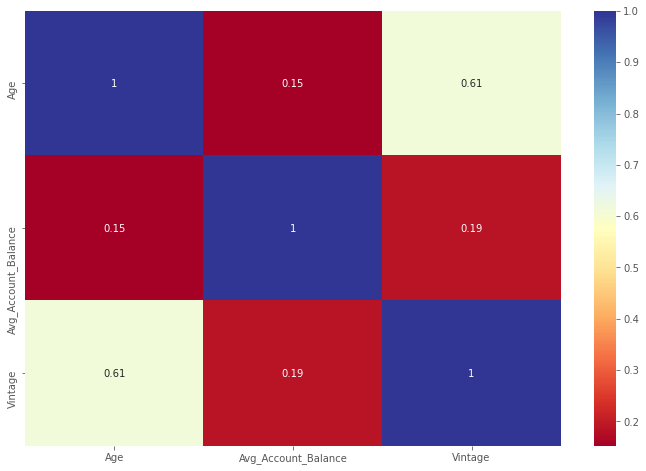

In [136]:
# First Check Correlation between Independent feature.

plt.figure(figsize=(12,8))
sns.heatmap(continous_feature.corr(),annot=True,cmap="RdYlBu")
plt.show()

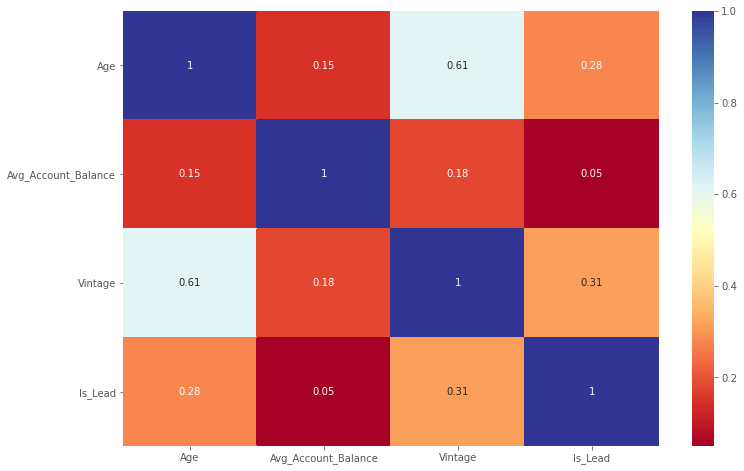

In [54]:
# Similarly Check Correlation between Independent and dependent features.

plt.figure(figsize=(12,8))
sns.heatmap(cont_feature_with_target.corr(),annot=True,cmap="RdYlBu")
plt.show()

In [137]:
from sklearn.ensemble import ExtraTreesClassifier


In [138]:
selection_by_tree_model = ExtraTreesClassifier()
selection_by_tree_model.fit(new_x_df,new_y_df)

ExtraTreesClassifier()

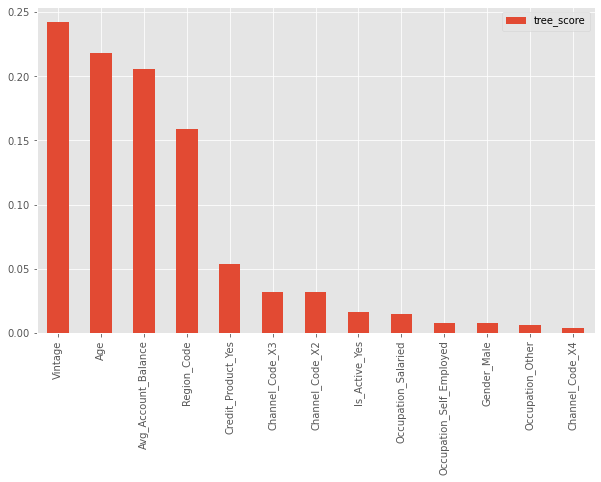

In [57]:
feature_ranked = pd.DataFrame(selection_by_tree_model.feature_importances_,index =new_x_df.columns,columns=["tree_score"])
feature_ranked.sort_values("tree_score",ascending=False).plot(kind="bar",figsize=(10,6))

In [139]:
new_x_df = new_x_df.drop(["Gender_Male","Occupation_Other","Channel_Code_X4"],axis=1)
test = test.drop(["Gender_Male","Occupation_Other","Channel_Code_X4"],axis=1)

In [140]:
# split training and validation data.

from sklearn.model_selection import train_test_split

x_train,x_valid,y_train,y_valid = train_test_split(new_x_df,new_y_df,test_size=0.3,random_state=23)

# Model Building

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,confusion_matrix,classification_report
import pickle

In [141]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)
rf_model.score(x_train,y_train)

1.0

In [142]:
# Prediction on validation data.

rf_prediction = rf_model.predict(x_valid)
print("Accuracy_Score: ",accuracy_score(y_valid,rf_prediction))
print("roc_auc_score: ",roc_auc_score(y_valid,rf_prediction))

Accuracy_Score:  0.8395967574308876
roc_auc_score:  0.8396156543590236


In [150]:
# Let's do hyperparameter tuning by Randomized Search CV on RandomForest Classifier

param = {"n_estimators":[50,100,200,250,300],"max_depth":[3,4,5,7,8,9,10,12],"min_samples_split":[2,3,4,5,6,7,8],
        "min_samples_leaf":[1,2,3,4,5,6,7],"max_features":["auto","log2"],"criterion":["gini","entropy"]}

rf_rdm_cv = RandomizedSearchCV(rf_model,param_distributions=param,cv=4,n_jobs=-1,verbose=12)
rf_rdm_cv.fit(x_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 7, 8, 9, 10, 12],
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8],
                                        'n_estimators': [50, 100, 200, 250,
                                                         300]},
                   verbose=12)

In [151]:

print("Best_parameters:",rf_rdm_cv.best_params_)


print("Best_Score:",rf_rdm_cv.best_score_)

Best_parameters: {'n_estimators': 250, 'min_samples_split': 8, 'min_samples_leaf': 7, 'max_features': 'log2', 'max_depth': 12, 'criterion': 'entropy'}
Best_Score: 0.7764662913340936


In [152]:
# save random forest model.

pickle_rf_file = open("rf_rdm_cv.pickle","wb")
pickle.dump(rf_rdm_cv,pickle_rf_file)
pickle_rf_file.close()

In [153]:
# Prediction on validation data.

rf_rdm_prediction = rf_rdm_cv.predict(x_valid)
print("Accuracy_Score: ",accuracy_score(y_valid,rf_rdm_prediction))
print("roc_auc_score: ",roc_auc_score(y_valid,rf_rdm_prediction))

Accuracy_Score:  0.7763458740386614
roc_auc_score:  0.7762905580305098


In [154]:
rf_proba = rf_rdm_cv.predict_proba(x_valid)[:,1]

Text(33.0, 0.5, 'Actual Values')

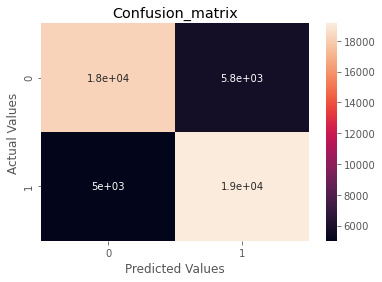

In [155]:
# Make Confusion matrix

sns.heatmap(confusion_matrix(y_valid,rf_rdm_prediction),annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

In [156]:
# print classification report
print(classification_report(y_valid,rf_rdm_prediction))

              precision    recall  f1-score   support

         0.0       0.78      0.76      0.77     23973
         1.0       0.77      0.79      0.78     24137

    accuracy                           0.78     48110
   macro avg       0.78      0.78      0.78     48110
weighted avg       0.78      0.78      0.78     48110



In [157]:
gb_model = GradientBoostingClassifier()
gb_model.fit(x_train,y_train)
gb_model.score(x_train,y_train)

0.7787200684150513

In [158]:
# Prediction on validation data.

gb_prediction = gb_model.predict(x_valid)
print("Accuracy_Score: ",accuracy_score(y_valid,gb_prediction))
print("roc_auc_score: ",roc_auc_score(y_valid,gb_prediction))

Accuracy_Score:  0.7758885886510081
roc_auc_score:  0.7758750725181344


In [159]:

# Let's do hyperparameter tuning by Randomized Search CV on GradientBoosting Classifier

param={"n_estimators":[50,100,200,250,300],"learning_rate":[0.01,0.1,0.3,0.5,0.7],
       "min_samples_split":[2,4,5,7],"max_depth":[3,5,7,9,12]}

gb_rdm_cv = RandomizedSearchCV(gb_model,param_distributions=param,cv=4,n_jobs=-1,verbose=5)
gb_rdm_cv.fit(x_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.3, 0.5,
                                                          0.7],
                                        'max_depth': [3, 5, 7, 9, 12],
                                        'min_samples_split': [2, 4, 5, 7],
                                        'n_estimators': [50, 100, 200, 250,
                                                         300]},
                   verbose=5)

In [160]:
print("Best_parameters:",gb_rdm_cv.best_params_)


print("Best_Score:",gb_rdm_cv.best_score_)

Best_parameters: {'n_estimators': 200, 'min_samples_split': 4, 'max_depth': 12, 'learning_rate': 0.1}
Best_Score: 0.8560611459521095


In [161]:

# Save GB Model
pickle_gb_file = open("gb_rdm_cv.pickle","wb")
pickle.dump(gb_rdm_cv,pickle_gb_file)
pickle_gb_file.close()

In [162]:
#Model Builded before so now just call it.

gb_rdm_cv = pickle.load(open("gb_rdm_cv.pickle","rb"))

In [163]:
# Prediction on validation data.

gb_rdm_prediction = gb_rdm_cv.predict(x_valid)
print("Accuracy_Score: ",accuracy_score(y_valid,gb_rdm_prediction))
print("roc_auc_score: ",roc_auc_score(y_valid,gb_rdm_prediction))

Accuracy_Score:  0.855497817501559
roc_auc_score:  0.855646495293077


In [164]:
gb_proba = gb_rdm_cv.predict_proba(x_valid)[:,1]

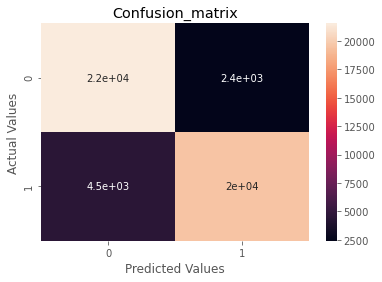

In [165]:
# Make Confusion matrix

sns.heatmap(confusion_matrix(y_valid,gb_rdm_prediction),annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [166]:

# print classification report
print(classification_report(y_valid,gb_rdm_prediction))

              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86     23973
         1.0       0.89      0.81      0.85     24137

    accuracy                           0.86     48110
   macro avg       0.86      0.86      0.86     48110
weighted avg       0.86      0.86      0.86     48110



In [167]:
from xgboost import XGBClassifier


In [168]:
xgb_model = XGBClassifier()
xgb_model.fit(x_train,y_train)
xgb_model.score(x_train,y_train)

C:\Users\Vinayak\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:33:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8749643671607754

In [169]:
# Prediction on validation data.

xgb_prediction = xgb_model.predict(x_valid)
print("Accuracy_Score: ",accuracy_score(y_valid,xgb_prediction))
print("roc_auc_score: ",roc_auc_score(y_valid,xgb_prediction))

Accuracy_Score:  0.8555601745998753
roc_auc_score:  0.8557471863487527


In [170]:
# Let's do hyperparameter tuning by Randomized Search CV on XGB Classifier

param = {"n_estimators":[50,100,200,300],"learning_rate":[0.001,0.1,0.5,0.7],"gamma":[0.01,0.1,1,10,100],
         "reg_lambda":[1,10,100,500,1000],"max_depth":[3,5,8,12,15]}

xgb_rdm_cv = RandomizedSearchCV(xgb_model,param_distributions=param,cv=5,n_jobs=-1,verbose=5)
xgb_rdm_cv.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\Vinayak\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:41:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=4,
                                           num_parallel_tree=1, random_state=0,
                                           reg_alpha=0, reg_lambda=1,
                                       

In [171]:
print("Best_parameters:",xgb_rdm_cv.best_params_)


print("Best_Score:",xgb_rdm_cv.best_score_)

Best_parameters: {'reg_lambda': 10, 'n_estimators': 100, 'max_depth': 8, 'learning_rate': 0.5, 'gamma': 1}
Best_Score: 0.8586534558309589


In [172]:
# Save Model
xgb_pickle_file = open("xgb_rdm_cv.pickle","wb")
pickle.dump(xgb_rdm_cv,xgb_pickle_file)
xgb_pickle_file.close()

In [173]:

# Call Saved Model

xgb_rdm_cv = pickle.load(open("xgb_rdm_cv.pickle","rb"))

In [174]:

# Prediction on validation data.

xgb_rdm_prediction = xgb_rdm_cv.predict(x_valid)
print("Accuracy_Score: ",accuracy_score(y_valid,xgb_rdm_prediction))
print("roc_auc_score: ",roc_auc_score(y_valid,xgb_rdm_prediction))

Accuracy_Score:  0.8559135314903347
roc_auc_score:  0.8561013267641499


In [175]:
xgb_proba = xgb_rdm_cv.predict_proba(x_valid)[:,1]

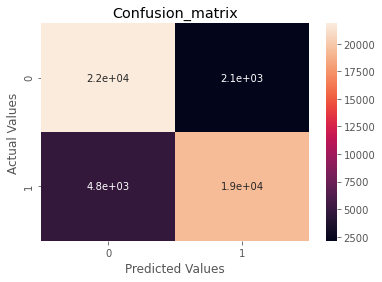

In [176]:
# Make Confusion matrix

sns.heatmap(confusion_matrix(y_valid,xgb_rdm_prediction),annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [177]:
# print classification report
print(classification_report(y_valid,xgb_rdm_prediction))

              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86     23973
         1.0       0.90      0.80      0.85     24137

    accuracy                           0.86     48110
   macro avg       0.86      0.86      0.86     48110
weighted avg       0.86      0.86      0.86     48110



In [178]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
dt_model.score(x_train,y_train)

1.0

In [179]:
# Prediction on validation data.

dt_prediction = dt_model.predict(x_valid)
print("Accuracy_Score: ",accuracy_score(y_valid,dt_prediction))
print("roc_auc_score: ",roc_auc_score(y_valid,dt_prediction))

Accuracy_Score:  0.7917272916233631
roc_auc_score:  0.7917179274931111


In [180]:
# Let's do hyperparameter tuning by Randomized Search CV on DecisionTree Classifier

param = {"max_depth":[3,4,5,7,8,9,10,12],"min_samples_split":[2,3,4,5,6,7,8],
        "min_samples_leaf":[1,2,3,4,5,6,7],"max_features":["auto","log2","sqrt"],"criterion":["gini","entropy"]}

dt_rdm_cv = RandomizedSearchCV(dt_model,param_distributions=param,n_iter=12,cv=5,n_jobs=-1,verbose=12)
dt_rdm_cv.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=12,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 7, 8, 9, 10, 12],
                                        'max_features': ['auto', 'log2',
                                                         'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8]},
                   verbose=12)

In [181]:

print("Best_parameters:",dt_rdm_cv.best_params_)


print("Best_Score:",dt_rdm_cv.best_score_)

Best_parameters: {'min_samples_split': 5, 'min_samples_leaf': 7, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'entropy'}
Best_Score: 0.7392833947942596


In [182]:
# Save Model
dt_pickle_file = open("dt_rdm_cv.pickle","wb")
pickle.dump(dt_rdm_cv,dt_pickle_file)
dt_pickle_file.close()

In [183]:
# Prediction on validation data.

dt_rdm_prediction = dt_rdm_cv.predict(x_valid)
print("Accuracy_Score: ",accuracy_score(y_valid,dt_rdm_prediction))
print("roc_auc_score: ",roc_auc_score(y_valid,dt_rdm_prediction))

Accuracy_Score:  0.7365828310122635
roc_auc_score:  0.7365907527118662


In [184]:
dt_proba = dt_rdm_cv.predict_proba(x_valid)[:,1]

In [185]:
# print classification report
print(classification_report(y_valid,dt_rdm_prediction))

              precision    recall  f1-score   support

         0.0       0.73      0.74      0.74     23973
         1.0       0.74      0.73      0.74     24137

    accuracy                           0.74     48110
   macro avg       0.74      0.74      0.74     48110
weighted avg       0.74      0.74      0.74     48110



In [186]:
# Now make ROC_CURVE for all Models 

rf_fpr,rf_tpr,rf_thresholds = roc_curve(y_valid,rf_proba)
gb_fpr,gb_tpr,gb_thresholds = roc_curve(y_valid,gb_proba)
xgb_fpr,xgb_tpr,xgb_thresholds = roc_curve(y_valid,xgb_proba)
dt_fpr,dt_tpr,dt_thresholds = roc_curve(y_valid,dt_proba)

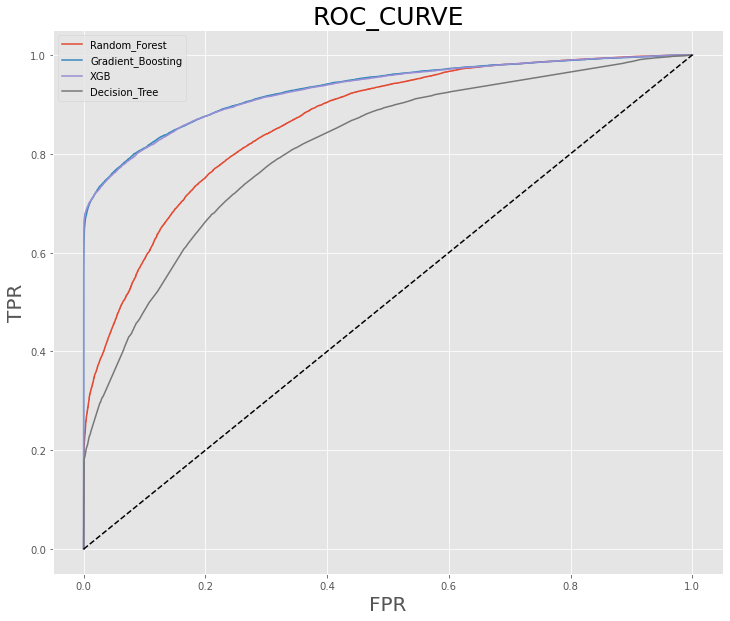

In [187]:
from matplotlib import style
style.use("ggplot")

plt.figure(figsize=(12,10))

plt.plot(rf_fpr,rf_tpr,label="Random_Forest")
plt.plot(gb_fpr,gb_tpr,label="Gradient_Boosting")
plt.plot(xgb_fpr,xgb_tpr,label="XGB")
plt.plot(dt_fpr,dt_tpr,label="Decision_Tree")
plt.plot([0,1],ls="dashed",color="black")

plt.legend()
plt.title("ROC_CURVE",fontsize=25)
plt.xlabel("FPR",fontsize=20)
plt.ylabel("TPR",fontsize=20)
plt.show()

# Prediction on Test

In [188]:
test_pred = gb_rdm_cv.predict(test)
test_pred = pd.DataFrame(test_pred)
test_pred

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
105308,1.0
105309,1.0
105310,0.0
105311,0.0


In [190]:
decision_t=pd.DataFrame(dt_prediction)

In [197]:
test_pred.to_csv('sample_submission_.csv',header=True,index=True)

In [192]:
decision_t.to_csv('decision_tree_1.csv')

In [198]:
ss=pd.read_csv('sample_submission_.csv')

In [199]:
ss

,Unnamed: 0,0
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
...,...,...
105308,105308,1.0
105309,105309,1.0
105310,105310,0.0
105311,105311,0.0


In [203]:
submission_file = pd.read_csv("sample_submission_eyYijxG.csv")

pred_file = pd.concat([submission_file["ID"],test_pred],axis=1)
pred_file.columns = ["id","Response"]
pred_file.to_csv("Credit_out_put.csv",index=False)